Final Project Submission <br>
Student name: Qilun Chen, Evan Serrano<br>
Student pace: full time<br>
Scheduled project review date/time: April/1/2022<br>
Instructor name: Praveen Gowtham, Joe Comeaux<br>
Blog post URL:https://github.com/nkbuddy/dsc-phase-3-project-NBA

### Table of Contents
* [STEP 1: Define the Problem](#Define-the-Problem)
* [Step 2: Gather the Data](#Gather-the-Data)
* [Step 3: Prepare Data for Consumption](#Prepare-Data-for-Consumption)
    * [3.1 Import Libraries](#Import-Libraries)
        * [3.11 Load Data Modelling Libraries](#Load-Data-Modelling-Libraries)
    * [3.2 Meet and Greet Data](#Meet-and-Greet-Data)
        * [3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting](#4C)
        * [3.22 Clean Data](#Clean-Data)
        * [3.23 Convert Formats](#Convert-Formats)
        * [3.24 Da-Double Check Cleaned Data](#Da-Double-Check-Cleaned-Data)
        * [3.25 Split Training and Testing Data](#Split-Training-and-Testing-Data)
* [Step 4: Perform Exploratory Analysis with Statistics](#Perform-Exploratory-Analysis-with-Statistics)
* [Step 5: Model Data](#Model-Data)
    * [5.1 Evaluate Model Performance](#Evaluate-Model-Performance)
        * [5.11 Model Performance with Cross-Validation (CV)](#CV)
        * [5.12 Tune Model with Hyper-Parameters](#Tune-Model-with-Hyper-Parameters)
        * [5.13 Tune Model with Feature Selection](#Tune-Model-with-Feature-Selection)
* [Step 6: Validate and Implement](#Validate-and-Implement)
* [STEP 7: Optimize and Strategize](#Optimize-and-Strategize)

# STEP 1: Define the Problem <a class="anchor" id="Define-the-Problem"></a>

Binary classification

# Step 2: Gather the Data <a class="anchor" id="Gather-the-Data"></a>

The dataset is also given to us at kaggle https://www.kaggle.com/datasets/dansbecker/nba-shot-logs

# Step 3: Prepare Data for Consumption <a class="anchor" id="Prepare-Data-for-Consumption"></a>

## 3.1 Import Libraries <a class="anchor" id="Import-Libraries"></a>

In [47]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import random
import time
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

## 3.11 Load Data Modelling Libraries <a class="anchor" id="Load-Data-Modelling-Libraries"></a>

In [48]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

## 3.2 Meet and Greet Data <a class="anchor" id="Meet-and-Greet-Data"></a>

In [49]:
df = pd.read_csv('shot_logs.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


### 3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting <a class="anchor" id="4C"></a>

In [50]:
print('columns with null values:\n', df.isnull().sum())


columns with null values:
 GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64


In [51]:
df.describe(include = 'all')

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
count,1.280690e+05,128069,128069,128069,128069.000000,128069.000000,128069.000000,128069,122502.000000,128069.000000,...,128069.000000,128069.000000,128069,128069,128069.000000,128069.000000,128069.000000,128069.000000,128069,128069.000000
unique,NaN,1808,2,2,NaN,NaN,NaN,719,NaN,NaN,...,NaN,NaN,2,473,NaN,NaN,NaN,NaN,281,NaN
top,NaN,"FEB 07, 2015 - DAL vs. POR",A,W,NaN,NaN,NaN,0:01,NaN,NaN,...,NaN,NaN,missed,"Ibaka, Serge",NaN,NaN,NaN,NaN,james harden,NaN
freq,NaN,105,64135,64595,NaN,NaN,NaN,859,NaN,NaN,...,NaN,NaN,70164,814,NaN,NaN,NaN,NaN,1054,NaN
mean,2.140045e+07,NaN,NaN,NaN,0.208723,6.506899,2.469427,NaN,12.453344,2.023355,...,13.571504,2.264670,NaN,NaN,159038.487284,4.123015,0.452139,0.997314,NaN,157238.251247
std,2.578773e+02,NaN,NaN,NaN,13.233267,4.713260,1.139919,NaN,5.763265,3.477760,...,8.888964,0.441159,NaN,NaN,78791.172947,2.756446,0.497706,1.130978,NaN,79362.389336
min,2.140000e+07,NaN,NaN,NaN,-53.000000,1.000000,1.000000,NaN,0.000000,0.000000,...,0.000000,2.000000,NaN,NaN,708.000000,0.000000,0.000000,0.000000,NaN,708.000000
25%,2.140023e+07,NaN,NaN,NaN,-8.000000,3.000000,1.000000,NaN,8.200000,0.000000,...,4.700000,2.000000,NaN,NaN,101249.000000,2.300000,0.000000,0.000000,NaN,101162.000000
50%,2.140045e+07,NaN,NaN,NaN,1.000000,5.000000,2.000000,NaN,12.300000,1.000000,...,13.700000,2.000000,NaN,NaN,201949.000000,3.700000,0.000000,0.000000,NaN,201939.000000
75%,2.140067e+07,NaN,NaN,NaN,9.000000,9.000000,3.000000,NaN,16.675000,2.000000,...,22.500000,3.000000,NaN,NaN,203079.000000,5.300000,1.000000,2.000000,NaN,202704.000000


### 3.22 Clean Data <a class="anchor" id="Clean-Data"></a>

In [52]:
df['SHOT_CLOCK'].fillna(0, inplace = True)

In [54]:
df['TOUCH_TIME'] = df['TOUCH_TIME'].clip(lower=0)

In [55]:
drop_column = ['GAME_ID','MATCHUP', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER','CLOSEST_DEFENDER','CLOSEST_DEFENDER_PLAYER_ID','PTS','player_name','player_id', 'SHOT_RESULT']
df = df.drop(drop_column, axis=1)
print(df.isnull().sum())

LOCATION          0
PERIOD            0
GAME_CLOCK        0
SHOT_CLOCK        0
DRIBBLES          0
TOUCH_TIME        0
SHOT_DIST         0
PTS_TYPE          0
CLOSE_DEF_DIST    0
FGM               0
dtype: int64


In [56]:
df['LOCATION'] = df['LOCATION'].astype('category')
df['LOCATION'] = df['LOCATION'].cat.codes

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LOCATION        128069 non-null  int8   
 1   PERIOD          128069 non-null  int64  
 2   GAME_CLOCK      128069 non-null  object 
 3   SHOT_CLOCK      128069 non-null  float64
 4   DRIBBLES        128069 non-null  int64  
 5   TOUCH_TIME      128069 non-null  float64
 6   SHOT_DIST       128069 non-null  float64
 7   PTS_TYPE        128069 non-null  int64  
 8   CLOSE_DEF_DIST  128069 non-null  float64
 9   FGM             128069 non-null  int64  
dtypes: float64(4), int64(4), int8(1), object(1)
memory usage: 8.9+ MB


### 3.23 Convert Formats <a class="anchor" id="Convert-Formats"></a>

### 3.24 Da-Double Check Cleaned Data <a class="anchor" id="Da-Double-Check-Cleaned-Data"></a>

In [58]:
print('columns with null values: \n', df.isnull().sum())
print("-"*10)
print (df.info())
print("-"*10)

df.describe(include = 'all')

columns with null values: 
 LOCATION          0
PERIOD            0
GAME_CLOCK        0
SHOT_CLOCK        0
DRIBBLES          0
TOUCH_TIME        0
SHOT_DIST         0
PTS_TYPE          0
CLOSE_DEF_DIST    0
FGM               0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LOCATION        128069 non-null  int8   
 1   PERIOD          128069 non-null  int64  
 2   GAME_CLOCK      128069 non-null  object 
 3   SHOT_CLOCK      128069 non-null  float64
 4   DRIBBLES        128069 non-null  int64  
 5   TOUCH_TIME      128069 non-null  float64
 6   SHOT_DIST       128069 non-null  float64
 7   PTS_TYPE        128069 non-null  int64  
 8   CLOSE_DEF_DIST  128069 non-null  float64
 9   FGM             128069 non-null  int64  
dtypes: float64(4), int64(4), int8(1), object(1)
memory usage: 8.9+ MB
None
---------

,LOCATION,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM
count,128069.000000,128069.000000,128069,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
unique,NaN,NaN,719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,0:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.499215,2.469427,NaN,11.912012,2.023355,2.771957,13.571504,2.264670,4.123015,0.452139
std,0.500001,1.139919,NaN,6.182215,3.477760,2.986698,8.888964,0.441159,2.756446,0.497706
min,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.000000,1.000000,NaN,7.500000,0.000000,0.900000,4.700000,2.000000,2.300000,0.000000
50%,0.000000,2.000000,NaN,12.000000,1.000000,1.600000,13.700000,2.000000,3.700000,0.000000
75%,1.000000,3.000000,NaN,16.400000,2.000000,3.700000,22.500000,3.000000,5.300000,1.000000


### 3.25 Split Training and Testing Data <a class="anchor" id="Split-Training-and-Testing-Data"></a>

In [59]:
X = df[['LOCATION', 'PERIOD', 'PTS_TYPE']]
y = df['FGM']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
print("Data1 Shape: {}".format(df.shape))

Data1 Shape: (128069, 10)


# Step 4: Perform Exploratory Analysis with Statistics <a class="anchor" id="Perform-Exploratory-Analysis-with-Statistics"></a>

In [60]:
for x in X:
    print('shot Correlation by:', x)
    print(df[[x, 'FGM']].groupby(x, as_index=False).mean())
    print('-'*10, '\n')

shot Correlation by: LOCATION
   LOCATION       FGM
0         0  0.448117
1         1  0.456174
---------- 

shot Correlation by: PERIOD
   PERIOD       FGM
0       1  0.460528
1       2  0.451107
2       3  0.457142
3       4  0.440099
4       5  0.390351
5       6  0.434524
6       7  0.372093
---------- 

shot Correlation by: PTS_TYPE
   PTS_TYPE       FGM
0         2  0.488357
1         3  0.351516
---------- 



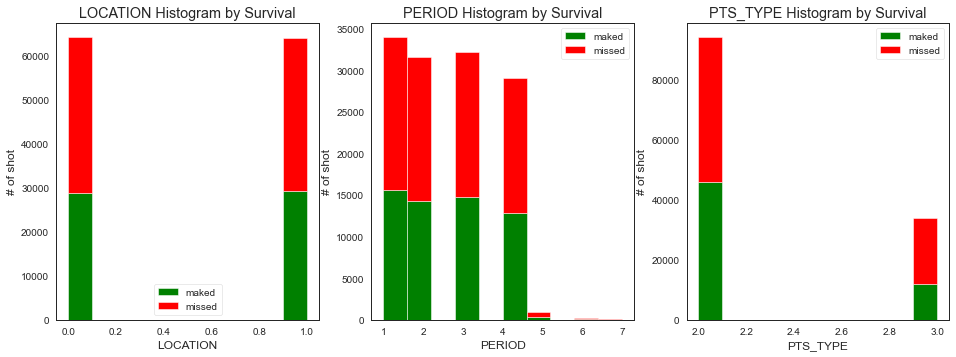

In [70]:
plt.figure(figsize=[16,12])

plt.subplot(234)
plt.hist(x = [df[df['FGM']==1]['LOCATION'], df[df['FGM']==0]['LOCATION']], 
         stacked=True, color = ['g','r'],label = ['maked','missed'])
plt.title('LOCATION Histogram by FGM')
plt.xlabel('LOCATION')
plt.ylabel('# of shot')
plt.legend()

plt.subplot(235)
plt.hist(x = [df[df['FGM']==1]['PERIOD'], df[df['FGM']==0]['PERIOD']], 
         stacked=True, color = ['g','r'],label = ['maked','missed'])
plt.title('PERIOD Histogram by FGM')
plt.xlabel('PERIOD')
plt.ylabel('# of shot')
plt.legend()

plt.subplot(236)
plt.hist(x = [df[df['FGM']==1]['PTS_TYPE'], df[df['FGM']==0]['PTS_TYPE']], 
         stacked=True, color = ['g','r'],label = ['maked','missed'])
plt.title('PTS_TYPE Histogram by FGM')
plt.xlabel('PTS_TYPE')
plt.ylabel('# of shot')
plt.legend()

<AxesSubplot:xlabel='PTS_TYPE', ylabel='FGM'>

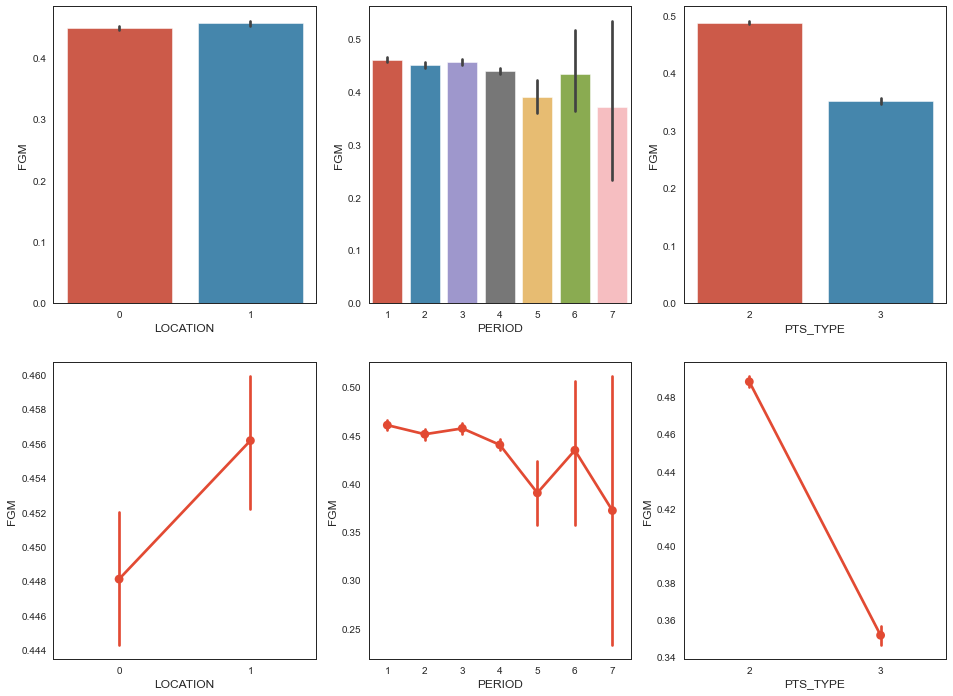

In [73]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'LOCATION', y = 'FGM', data=df, ax = saxis[0,0])
sns.barplot(x = 'PERIOD', y = 'FGM', data=df, ax = saxis[0,1])
sns.barplot(x = 'PTS_TYPE', y = 'FGM', data=df, ax = saxis[0,2])

sns.pointplot(x = 'LOCATION', y = 'FGM',  data=df, ax = saxis[1,0])
sns.pointplot(x = 'PERIOD', y = 'FGM',  data=df, ax = saxis[1,1])
sns.pointplot(x = 'PTS_TYPE', y = 'FGM', data=df, ax = saxis[1,2])

In [74]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature

In [ ]:
#graph distribution of qualitative data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature

In [ ]:
#more side-by-side comparisons

In [ ]:
#how does embark port factor with class, sex, and survival compare
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

In [ ]:
#plot distributions of age of passengers who survived or did not survive

In [ ]:
#histogram comparison of sex, class, and age by survival

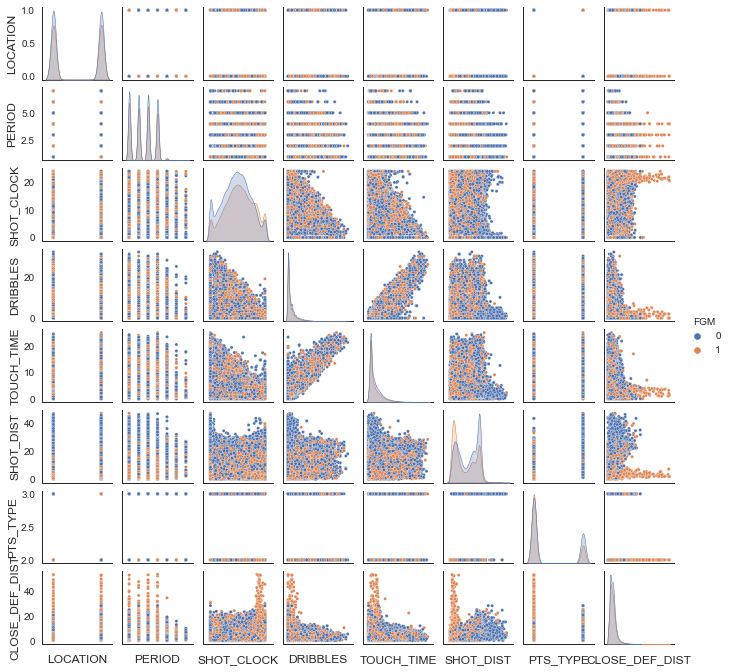

In [75]:
pp = sns.pairplot(df, hue = 'FGM', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

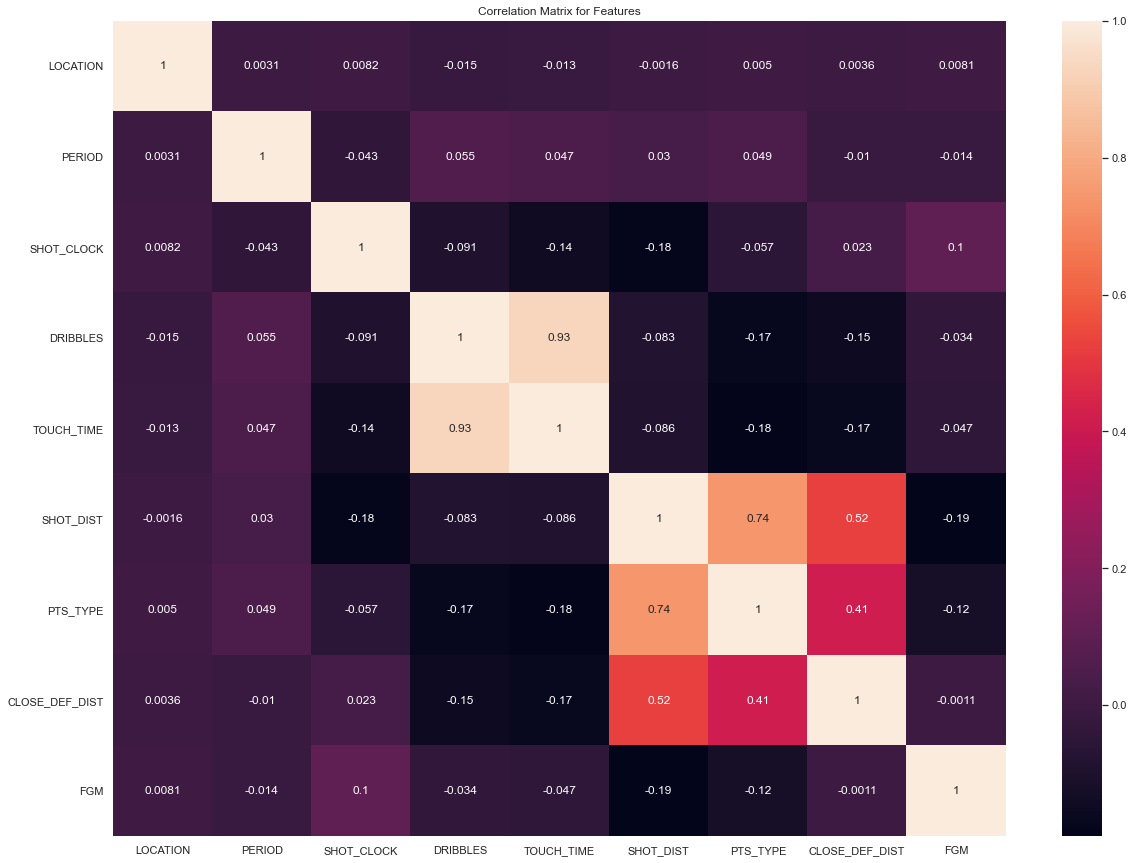

In [76]:
plt.figure(figsize = (20, 15))
sns.set(style="white")
sns.heatmap(df.corr(), annot = True)


plt.title('Correlation Matrix for Features')
plt.show()

# Step 5: Model Data <a class="anchor" id="Model-Data"></a>

In [86]:
data1_x_bin = ['SHOT_DIST']

In [87]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA_predict = df['FGM']

row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, df[data1_x_bin], df['FGM'], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(df[data1_x_bin], df['FGM'])
    MLA_predict[MLA_name] = alg.predict(df[data1_x_bin])
    
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare


KeyError: 'train_score'

## 5.1 Evaluate Model Performance <a class="anchor" id="Evaluate-Model-Performance"></a>

### 5.11 Model Performance with Cross-Validation (CV) <a class="anchor" id="CV"></a>

### 5.12 Tune Model with Hyper-Parameters <a class="anchor" id="Tune-Model-with-Hyper-Parameters"></a>

### 5.13 Tune Model with Feature Selection <a class="anchor" id="Tune-Model-with-Feature-Selection"></a>

# Step 6: Validate and Implement <a class="anchor" id="Validate-and-Implement"></a>

# Step 7: Optimize and Strategize<a class="anchor" id="Optimize-and-Strategize"></a>